In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
cus = pd.read_csv(r"C:\Users\jeeve\Desktop\PGC\Course 6 ML\project\Customer_data - customer_data.csv")

In [3]:
cus.info()
cus.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("\nSummary Statistics:\n", cus.describe())
print("\nMissing Values:\n", cus.isnull().sum())


Summary Statistics:
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

Missing Values:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling

In [5]:
cus.replace(" ", np.nan, inplace=True)  
cus.dropna(inplace=True)

In [6]:
cus["TotalCharges"] = pd.to_numeric(cus["TotalCharges"], errors='coerce')

In [7]:
X = cus.drop(columns=["customerID", "Churn"])  
y = cus["Churn"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
scaler = StandardScaler()
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols].copy())
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols].copy())

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [12]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns so both sets have same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [13]:

param_grid = {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
models["Tuned Random Forest"] = best_rf

In [15]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes')
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.8045
Precision: 0.6495
Recall: 0.5749
F1 Score: 0.6099
Confusion Matrix:
 [[917 116]
 [159 215]]
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.89      0.87      1033
         Yes       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


Model: Random Forest
Accuracy: 0.7875
Precision: 0.6307
Recall: 0.4840
F1 Score: 0.5477
Confusion Matrix:
 [[927 106]
 [193 181]]
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.90      0.86      1033
         Yes       0.63      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407


Model: Tuned Random Forest
Ac

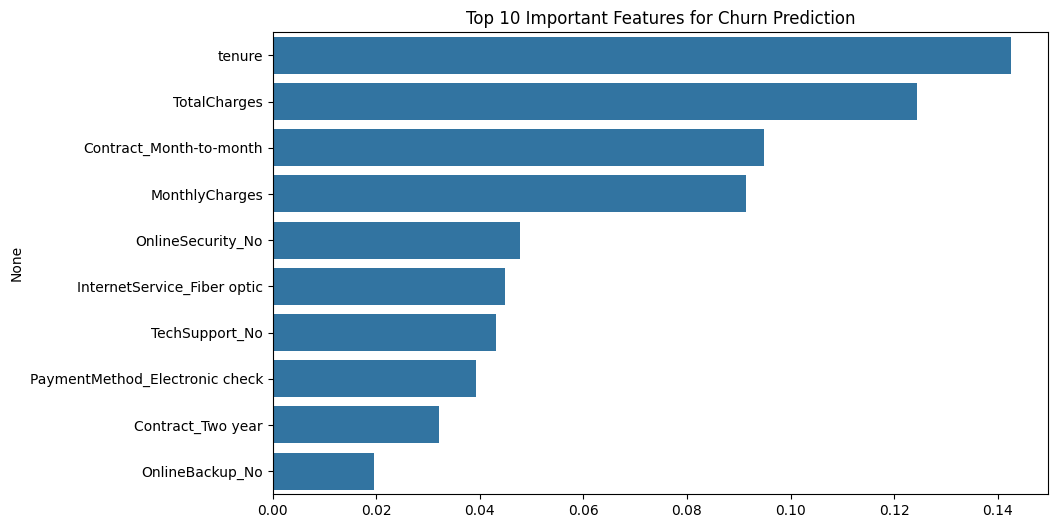

In [16]:
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10])
plt.title("Top 10 Important Features for Churn Prediction")
plt.show()

In [17]:
def predict_new_data(new_data):
    new_data[numeric_cols] = scaler.transform(new_data[numeric_cols])
    return best_rf.predict("airbnb_data.xlsx")

print("\nModel training and evaluation complete.")


Model training and evaluation complete.


In [18]:
import os
video_link = "https://drive.google.com/file/d/1jwldICvsdeKASBkFGQdSiXdwptFZS_R2/view?usp=drive_link"
file_name = "Video_Explanation_Link.txt"

with open(file_name, "w") as file:
    file.write(f"Project Video Explanation Link: {video_link}")

print("Video explanation link saved successfully.")
print(f"Your Video Explanation Link: {video_link}")

if os.path.exists(file_name):
    print("File created successfully with video link.")
else:
    print("Error in creating the file.")


Video explanation link saved successfully.
Your Video Explanation Link: https://drive.google.com/file/d/1jwldICvsdeKASBkFGQdSiXdwptFZS_R2/view?usp=drive_link
File created successfully with video link.
